In [1]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [2]:
df= pd.read_csv("energy_op_full_data_output_30.csv")
df

,Date_time_name,Pred_LSTM,Pred_GRU,Pred_BILSTM,Actual_Values,new_col,Optimal_Values
0,4/10/2017 9:53,1121.088294,1215.110899,1102.476018,1093,0,1102.476018
1,4/10/2017 9:54,1121.881762,1218.953583,1102.714589,1097,1,1102.714589
2,4/10/2017 9:55,1119.412270,1223.058289,1104.584313,1098,2,1104.584313
3,4/10/2017 9:56,1122.117909,1224.875412,1102.126809,1101,3,1102.126809
4,4/10/2017 9:57,1129.223881,1227.058579,1107.834107,1098,4,1107.834107
...,...,...,...,...,...,...,...
44048,31/12/2017 18:41,364.838215,428.577004,379.603025,117,44048,364.838215
44049,31/12/2017 18:42,109.978700,316.422802,168.295401,84,44049,109.978700
44050,31/12/2017 18:45,129.602544,280.102096,149.525454,60,44050,129.602544
44051,31/12/2017 18:46,89.445705,206.020283,124.016169,58,44051,89.445705


In [3]:
df.dtypes

Date_time_name     object
Pred_LSTM         float64
Pred_GRU          float64
Pred_BILSTM       float64
Actual_Values       int64
new_col             int64
Optimal_Values    float64
dtype: object

**Scaled Output**
---

In [4]:
df_scaled =df[['Pred_LSTM', 'Pred_GRU', 'Pred_BILSTM', 'Actual_Values',
       'Optimal_Values']]

In [5]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_scaled)
data_scaled

array([[0.96722588, 0.9325917 , 0.97362516, 0.94813467, 0.91139749],
       [0.96794382, 0.9354848 , 0.97386124, 0.95177434, 0.91159785],
       [0.9657094 , 0.93857518, 0.97571152, 0.95268426, 0.91316806],
       ...,
       [0.0701202 , 0.22863647, 0.0305877 , 0.00818926, 0.09437063],
       [0.03378592, 0.17286129, 0.00534377, 0.00636943, 0.0606466 ],
       [0.03588473, 0.16584462, 0.00685865, 0.02456779, 0.06259463]])

In [6]:
data_df= pd.DataFrame(data_scaled,columns=['Pred_LSTM','Pred_GRU','Pred_BILSTM','Actual_Values','Optimal_Values'])
data_df

,Pred_LSTM,Pred_GRU,Pred_BILSTM,Actual_Values,Optimal_Values
0,0.967226,0.932592,0.973625,0.948135,0.911397
1,0.967944,0.935485,0.973861,0.951774,0.911598
2,0.965709,0.938575,0.975712,0.952684,0.913168
3,0.968157,0.939943,0.973280,0.955414,0.911104
4,0.974587,0.941587,0.978928,0.952684,0.915897
...,...,...,...,...,...
44048,0.282964,0.340421,0.258272,0.060055,0.291923
44049,0.052364,0.255982,0.049162,0.030027,0.077890
44050,0.070120,0.228636,0.030588,0.008189,0.094371
44051,0.033786,0.172861,0.005344,0.006369,0.060647


In [7]:
y_pred=data_df['Pred_LSTM']
y_test=data_df['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))
  return mape

MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
R2 = r2_score(y_test,y_pred)
MAPE=np.mean(np.abs((y_test - y_pred)/y_test))
print('Mean Absolute Error: {:.4f}'.format(MAE))
print('Root Mean Square Error: {:.4f}'.format(RMSE))
print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
print('Mean Square Error: {:.4f}'.format(MSE))
print('r_2 score:{:.4f}'.format(R2))
print('MAPE score:{:.4f}'.format(MAPE))
print('')

Mean Absolute Error: 0.0502
Root Mean Square Error: 0.0933
Root Mean Square Error_LOG: -2.3720
Mean Square Error: 0.0087
r_2 score:0.9204
MAPE score:inf



In [8]:
y_pred=data_df['Pred_BILSTM']
y_test=data_df['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))
  return mape

MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
R2 = r2_score(y_test,y_pred)
MAPE=np.mean(np.abs((y_test - y_pred)/y_test))
print('Mean Absolute Error: {:.4f}'.format(MAE))
print('Root Mean Square Error: {:.4f}'.format(RMSE))
print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
print('Mean Square Error: {:.4f}'.format(MSE))
print('r_2 score:{:.4f}'.format(R2))
print('MAPE score:{:.4f}'.format(MAPE))
print('')

Mean Absolute Error: 0.0459
Root Mean Square Error: 0.0926
Root Mean Square Error_LOG: -2.3792
Mean Square Error: 0.0086
r_2 score:0.9216
MAPE score:inf



In [9]:
y_pred=data_df['Pred_GRU']
y_test=data_df['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))
  return mape

MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
R2 = r2_score(y_test,y_pred)
MAPE=np.mean(np.abs((y_test - y_pred)/y_test))
print('Mean Absolute Error: {:.4f}'.format(MAE))
print('Root Mean Square Error: {:.4f}'.format(RMSE))
print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
print('Mean Square Error: {:.4f}'.format(MSE))
print('r_2 score:{:.4f}'.format(R2))
print('MAPE score:{:.4f}'.format(MAPE))
print('')

Mean Absolute Error: 0.0877
Root Mean Square Error: 0.1191
Root Mean Square Error_LOG: -2.1279
Mean Square Error: 0.0142
r_2 score:0.8704
MAPE score:inf



In [10]:
y_pred=data_df['Optimal_Values']
y_test=data_df['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))
  return mape

MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
R2 = r2_score(y_test,y_pred)
MAPE=np.mean(np.abs((y_test - y_pred)/y_test))
print('Mean Absolute Error: {:.4f}'.format(MAE))
print('Root Mean Square Error: {:.4f}'.format(RMSE))
print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
print('Mean Square Error: {:.4f}'.format(MSE))
print('r_2 score:{:.4f}'.format(R2))
print('MAPE score:{:.4f}'.format(MAPE))
print('')

Mean Absolute Error: 0.0510
Root Mean Square Error: 0.0824
Root Mean Square Error_LOG: -2.4958
Mean Square Error: 0.0068
r_2 score:0.9379
MAPE score:inf



In [11]:
extracted_col = df["Date_time_name"]
data_df = data_df.join(extracted_col)
data_df 

,Pred_LSTM,Pred_GRU,Pred_BILSTM,Actual_Values,Optimal_Values,Date_time_name
0,0.967226,0.932592,0.973625,0.948135,0.911397,4/10/2017 9:53
1,0.967944,0.935485,0.973861,0.951774,0.911598,4/10/2017 9:54
2,0.965709,0.938575,0.975712,0.952684,0.913168,4/10/2017 9:55
3,0.968157,0.939943,0.973280,0.955414,0.911104,4/10/2017 9:56
4,0.974587,0.941587,0.978928,0.952684,0.915897,4/10/2017 9:57
...,...,...,...,...,...,...
44048,0.282964,0.340421,0.258272,0.060055,0.291923,31/12/2017 18:41
44049,0.052364,0.255982,0.049162,0.030027,0.077890,31/12/2017 18:42
44050,0.070120,0.228636,0.030588,0.008189,0.094371,31/12/2017 18:45
44051,0.033786,0.172861,0.005344,0.006369,0.060647,31/12/2017 18:46


In [12]:
df_month=data_df.set_index('Date_time_name')
df_month

,Pred_LSTM,Pred_GRU,Pred_BILSTM,Actual_Values,Optimal_Values
Date_time_name,,,,,
4/10/2017 9:53,0.967226,0.932592,0.973625,0.948135,0.911397
4/10/2017 9:54,0.967944,0.935485,0.973861,0.951774,0.911598
4/10/2017 9:55,0.965709,0.938575,0.975712,0.952684,0.913168
4/10/2017 9:56,0.968157,0.939943,0.973280,0.955414,0.911104
4/10/2017 9:57,0.974587,0.941587,0.978928,0.952684,0.915897
...,...,...,...,...,...
31/12/2017 18:41,0.282964,0.340421,0.258272,0.060055,0.291923
31/12/2017 18:42,0.052364,0.255982,0.049162,0.030027,0.077890
31/12/2017 18:45,0.070120,0.228636,0.030588,0.008189,0.094371


In [13]:
oct = df_month[:13532]
oct


,Pred_LSTM,Pred_GRU,Pred_BILSTM,Actual_Values,Optimal_Values
Date_time_name,,,,,
4/10/2017 9:53,0.967226,0.932592,0.973625,0.948135,0.911397
4/10/2017 9:54,0.967944,0.935485,0.973861,0.951774,0.911598
4/10/2017 9:55,0.965709,0.938575,0.975712,0.952684,0.913168
4/10/2017 9:56,0.968157,0.939943,0.973280,0.955414,0.911104
4/10/2017 9:57,0.974587,0.941587,0.978928,0.952684,0.915897
...,...,...,...,...,...
31/10/2017 17:41,0.043198,0.059324,0.011612,0.013649,0.031901
31/10/2017 17:42,0.039853,0.050875,0.011301,0.006369,0.022478
31/10/2017 17:43,0.033607,0.080794,0.009258,0.010009,0.055851


In [14]:
Nov = df_month[13532:28138]
Nov


,Pred_LSTM,Pred_GRU,Pred_BILSTM,Actual_Values,Optimal_Values
Date_time_name,,,,,
1/11/2017 6:19,0.033649,0.077283,0.008124,0.005460,0.051934
1/11/2017 6:20,0.028056,0.082569,0.004123,0.007279,0.055328
1/11/2017 6:21,0.030205,0.075497,0.001381,0.008189,0.049942
1/11/2017 6:22,0.025733,0.078934,0.002259,0.008189,0.053172
1/11/2017 6:23,0.027581,0.103371,0.002998,0.004550,0.054888
...,...,...,...,...,...
30/11/2017 18:23,0.418055,0.453252,0.349582,0.390355,0.381812
30/11/2017 18:24,0.408291,0.470617,0.342943,0.375796,0.376178
30/11/2017 18:26,0.391154,0.431545,0.322670,0.158326,0.358974


In [15]:
Dec= df_month[28138:]
Dec

,Pred_LSTM,Pred_GRU,Pred_BILSTM,Actual_Values,Optimal_Values
Date_time_name,,,,,
1/12/2017 6:24,0.045169,0.220576,0.018618,0.024568,0.071212
1/12/2017 6:25,0.050009,0.191633,0.028925,0.016379,0.075704
1/12/2017 6:31,0.039780,0.179274,0.017368,0.005460,0.066210
1/12/2017 6:32,0.032427,0.175867,0.017070,0.007279,0.059386
1/12/2017 6:33,0.035298,0.158704,0.015111,0.011829,0.062050
...,...,...,...,...,...
31/12/2017 18:41,0.282964,0.340421,0.258272,0.060055,0.291923
31/12/2017 18:42,0.052364,0.255982,0.049162,0.030027,0.077890
31/12/2017 18:45,0.070120,0.228636,0.030588,0.008189,0.094371


**Scaled_Oct**

In [16]:
y_pred=oct['Pred_BILSTM']
y_test=oct['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))
  return mape

MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
R2 = r2_score(y_test,y_pred)
MAPE=np.mean(np.abs((y_test - y_pred)/y_test))
print('Mean Absolute Error: {:.4f}'.format(MAE))
print('Root Mean Square Error: {:.4f}'.format(RMSE))
print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
print('Mean Square Error: {:.4f}'.format(MSE))
print('r_2 score:{:.4f}'.format(R2))
print('MAPE score:{:.4f}'.format(MAPE))
print('')

Mean Absolute Error: 0.0490
Root Mean Square Error: 0.0935
Root Mean Square Error_LOG: -2.3695
Mean Square Error: 0.0087
r_2 score:0.9112
MAPE score:inf



**Scaled_Nov**

In [17]:
y_pred=Nov['Pred_BILSTM']
y_test=Nov['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))
  return mape

MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
R2 = r2_score(y_test,y_pred)
MAPE=np.mean(np.abs((y_test - y_pred)/y_test))
print('Mean Absolute Error: {:.4f}'.format(MAE))
print('Root Mean Square Error: {:.4f}'.format(RMSE))
print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
print('Mean Square Error: {:.4f}'.format(MSE))
print('r_2 score:{:.4f}'.format(R2))
print('MAPE score:{:.4f}'.format(MAPE))
print('')

Mean Absolute Error: 0.0502
Root Mean Square Error: 0.0997
Root Mean Square Error_LOG: -2.3059
Mean Square Error: 0.0099
r_2 score:0.9069
MAPE score:inf



**Scaled_dec**

In [18]:
y_pred=Dec['Pred_BILSTM']
y_test=Dec['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))
  return mape

MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
R2 = r2_score(y_test,y_pred)
MAPE=np.mean(np.abs((y_test - y_pred)/y_test))
print('Mean Absolute Error: {:.4f}'.format(MAE))
print('Root Mean Square Error: {:.4f}'.format(RMSE))
print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
print('Mean Square Error: {:.4f}'.format(MSE))
print('r_2 score:{:.4f}'.format(R2))
print('MAPE score:{:.4f}'.format(MAPE))
print('')

Mean Absolute Error: 0.0393
Root Mean Square Error: 0.0848
Root Mean Square Error_LOG: -2.4672
Mean Square Error: 0.0072
r_2 score:0.9303
MAPE score:inf



**Normal_Data_points**
---

**LSTM**

In [19]:
y_pred=df['Pred_LSTM']
y_test=df['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))
  return mape

MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
R2 = r2_score(y_test,y_pred)
MAPE=np.mean(np.abs((y_test - y_pred)/y_test))
print('Mean Absolute Error: {:.4f}'.format(MAE))
print('Root Mean Square Error: {:.4f}'.format(RMSE))
print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
print('Mean Square Error: {:.4f}'.format(MSE))
print('r_2 score:{:.4f}'.format(R2))
print('MAPE score:{:.4f}'.format(MAPE))
print('')

Mean Absolute Error: 57.4819
Root Mean Square Error: 103.6408
Root Mean Square Error_LOG: 4.6409
Mean Square Error: 10741.4141
r_2 score:0.9187
MAPE score:0.1470



**BI_LSTM**

In [20]:
y_pred=df['Pred_BILSTM']
y_test=df['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))
  return mape

MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
R2 = r2_score(y_test,y_pred)
MAPE=np.mean(np.abs((y_test - y_pred)/y_test))
print('Mean Absolute Error: {:.4f}'.format(MAE))
print('Root Mean Square Error: {:.4f}'.format(RMSE))
print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
print('Mean Square Error: {:.4f}'.format(MSE))
print('r_2 score:{:.4f}'.format(R2))
print('MAPE score:{:.4f}'.format(MAPE))
print('')

Mean Absolute Error: 56.7198
Root Mean Square Error: 103.2481
Root Mean Square Error_LOG: 4.6371
Mean Square Error: 10660.1717
r_2 score:0.9193
MAPE score:0.1919



**GRU**

In [21]:
y_pred=df['Pred_GRU']
y_test=df['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))
  return mape

MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
R2 = r2_score(y_test,y_pred)
MAPE=np.mean(np.abs((y_test - y_pred)/y_test))
print('Mean Absolute Error: {:.4f}'.format(MAE))
print('Root Mean Square Error: {:.4f}'.format(RMSE))
print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
print('Mean Square Error: {:.4f}'.format(MSE))
print('r_2 score:{:.4f}'.format(R2))
print('MAPE score:{:.4f}'.format(MAPE))
print('')

Mean Absolute Error: 100.6701
Root Mean Square Error: 141.9962
Root Mean Square Error_LOG: 4.9558
Mean Square Error: 20162.9174
r_2 score:0.8474
MAPE score:0.2775



**Hybrid**

In [22]:
y_pred=df['Optimal_Values']
y_test=df['Actual_Values']
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))
  return mape

MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
R2 = r2_score(y_test,y_pred)
MAPE=np.mean(np.abs((y_test - y_pred)/y_test))
print('Mean Absolute Error: {:.4f}'.format(MAE))
print('Root Mean Square Error: {:.4f}'.format(RMSE))
print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
print('Mean Square Error: {:.4f}'.format(MSE))
print('r_2 score:{:.4f}'.format(R2))
print('MAPE score:{:.4f}'.format(MAPE))
print('')

Mean Absolute Error: 38.6380
Root Mean Square Error: 85.7017
Root Mean Square Error_LOG: 4.4509
Mean Square Error: 7344.7894
r_2 score:0.9444
MAPE score:0.1117



In [23]:
df['month'] = pd.DatetimeIndex(df['Date_time_name']).month
df['year'] = pd.DatetimeIndex(df['Date_time_name']).year
df['day'] = pd.DatetimeIndex(df['Date_time_name']).day
df['hour'] = pd.DatetimeIndex(df['Date_time_name']).hour
df['minutes'] = pd.DatetimeIndex(df['Date_time_name']).minute

df['month_year'] = [str(i)+'-'+str(j) for i,j in zip(df.year, df.month)]
df['day_year'] = [str(i)+'-'+str(j) for i,j in zip(df.day, df.month)]
df['hour_day'] = [str(i)+'-'+str(j) for i,j in zip(df.hour, df.day)]
df['hour_minutes'] = [str(i)+'-'+str(j) for i,j in zip(df.hour, df.minutes)]
df.head()

,Date_time_name,Pred_LSTM,Pred_GRU,Pred_BILSTM,Actual_Values,new_col,Optimal_Values,month,year,day,hour,minutes,month_year,day_year,hour_day,hour_minutes
0,4/10/2017 9:53,1121.088294,1215.110899,1102.476018,1093,0,1102.476018,4,2017,10,9,53,2017-4,10-4,9-10,9-53
1,4/10/2017 9:54,1121.881762,1218.953583,1102.714589,1097,1,1102.714589,4,2017,10,9,54,2017-4,10-4,9-10,9-54
2,4/10/2017 9:55,1119.412270,1223.058289,1104.584313,1098,2,1104.584313,4,2017,10,9,55,2017-4,10-4,9-10,9-55
3,4/10/2017 9:56,1122.117909,1224.875412,1102.126809,1101,3,1102.126809,4,2017,10,9,56,2017-4,10-4,9-10,9-56
4,4/10/2017 9:57,1129.223881,1227.058579,1107.834107,1098,4,1107.834107,4,2017,10,9,57,2017-4,10-4,9-10,9-57


**Full model_Predictions**
---

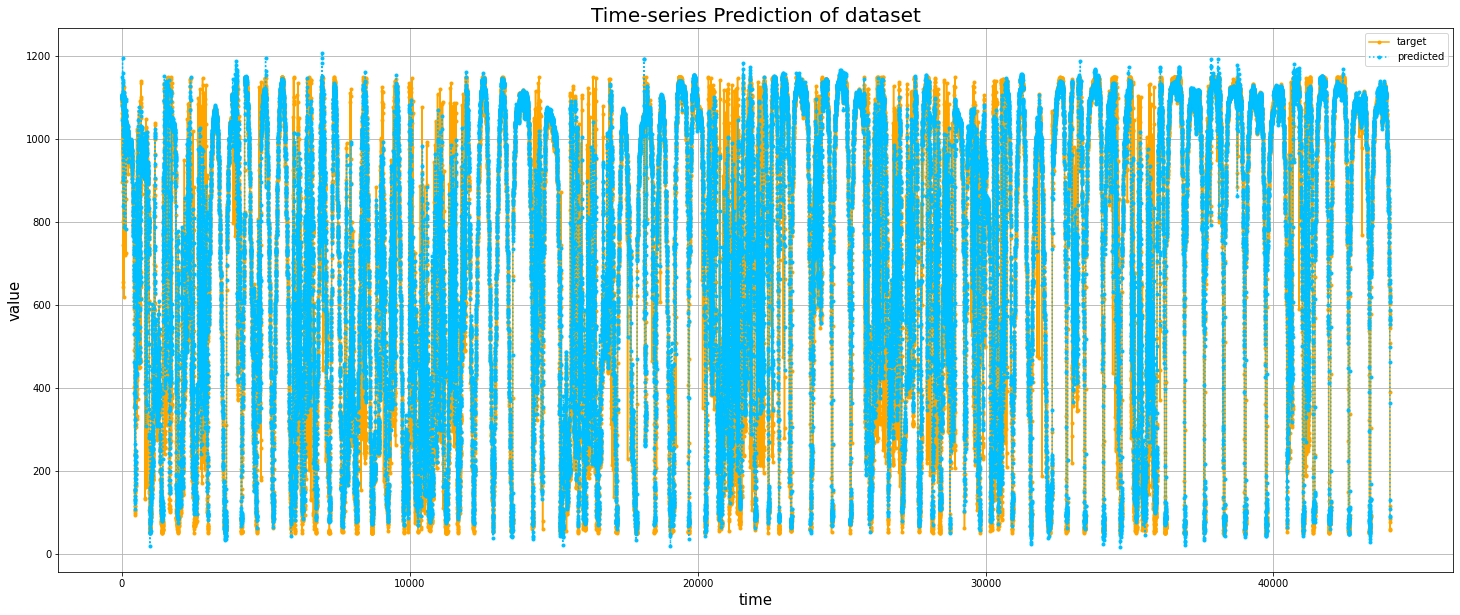

Prediction plot is saved to./predictionPlot.png


In [24]:
#algorithm= net.name
plt.figure(figsize=(25,10))
targetPlot,=plt.plot(df.Actual_Values,label='target',color='orange',marker='.',linestyle='-')
predictedPlot,=plt.plot(df.Optimal_Values,label='predicted',color='deepskyblue',marker='.',linestyle=':')
#plt.xlim([8500,9000])
  #plt.ylim([0, 1000])
plt.ylabel('value',fontsize=15)
plt.xlabel('time',fontsize=15)
plt.ion()
plt.grid()
plt.legend(handles=[targetPlot, predictedPlot])
plt.title('Time-series Prediction of dataset',fontsize=20,fontweight=40)
plot_path = './predictionPlot.png'
plt.savefig(plot_path,plot_pathbbox_inches='tight')
plt.draw()
plt.show()
plt.pause(0)
print('Prediction plot is saved to'+plot_path)

**Hybrid_Model_Prediction**
---

In [25]:
df_day= df[0:1000]
df_day

,Date_time_name,Pred_LSTM,Pred_GRU,Pred_BILSTM,Actual_Values,new_col,Optimal_Values,month,year,day,hour,minutes,month_year,day_year,hour_day,hour_minutes
0,4/10/2017 9:53,1121.088294,1215.110899,1102.476018,1093,0,1102.476018,4,2017,10,9,53,2017-4,10-4,9-10,9-53
1,4/10/2017 9:54,1121.881762,1218.953583,1102.714589,1097,1,1102.714589,4,2017,10,9,54,2017-4,10-4,9-10,9-54
2,4/10/2017 9:55,1119.412270,1223.058289,1104.584313,1098,2,1104.584313,4,2017,10,9,55,2017-4,10-4,9-10,9-55
3,4/10/2017 9:56,1122.117909,1224.875412,1102.126809,1101,3,1102.126809,4,2017,10,9,56,2017-4,10-4,9-10,9-56
4,4/10/2017 9:57,1129.223881,1227.058579,1107.834107,1098,4,1107.834107,4,2017,10,9,57,2017-4,10-4,9-10,9-57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,6/10/2017 7:57,111.798574,177.952092,138.541098,88,995,111.798574,6,2017,10,7,57,2017-6,10-6,7-10,7-57
996,6/10/2017 7:58,115.754713,104.642851,140.239262,94,996,104.642851,6,2017,10,7,58,2017-6,10-6,7-10,7-58
997,6/10/2017 7:59,122.801370,59.832762,144.464892,92,997,122.801370,6,2017,10,7,59,2017-6,10-6,7-10,7-59
998,6/10/2017 8:00,119.461408,44.752281,141.963040,97,998,119.461408,6,2017,10,8,0,2017-6,10-6,8-10,8-0


In [26]:
df_day = df_day[::5]
df_day

,Date_time_name,Pred_LSTM,Pred_GRU,Pred_BILSTM,Actual_Values,new_col,Optimal_Values,month,year,day,hour,minutes,month_year,day_year,hour_day,hour_minutes
0,4/10/2017 9:53,1121.088294,1215.110899,1102.476018,1093,0,1102.476018,4,2017,10,9,53,2017-4,10-4,9-10,9-53
5,4/10/2017 9:58,1122.917011,1225.144378,1105.702165,1095,5,1105.702165,4,2017,10,9,58,2017-4,10-4,9-10,9-58
10,4/10/2017 10:03,1121.128187,1199.127163,1098.544902,1063,10,1098.544902,4,2017,10,10,3,2017-4,10-4,10-10,10-3
15,4/10/2017 10:08,1126.893719,1225.208442,1103.855630,1099,15,1103.855630,4,2017,10,10,8,2017-4,10-4,10-10,10-8
20,4/10/2017 10:13,899.562106,1149.173583,919.181856,1051,20,1149.173583,4,2017,10,10,13,2017-4,10-4,10-10,10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,5/10/2017 16:28,115.173319,51.500986,130.115059,60,975,51.500986,5,2017,10,16,28,2017-5,10-5,16-10,16-28
980,5/10/2017 16:33,105.868000,9.441343,128.776782,61,980,105.868000,5,2017,10,16,33,2017-5,10-5,16-10,16-33
985,6/10/2017 7:47,91.386698,77.734467,125.134872,69,985,77.734467,6,2017,10,7,47,2017-6,10-6,7-10,7-47
990,6/10/2017 7:52,107.528958,101.008343,132.506076,73,990,101.008343,6,2017,10,7,52,2017-6,10-6,7-10,7-52


In [27]:
df_day

,Date_time_name,Pred_LSTM,Pred_GRU,Pred_BILSTM,Actual_Values,new_col,Optimal_Values,month,year,day,hour,minutes,month_year,day_year,hour_day,hour_minutes
0,4/10/2017 9:53,1121.088294,1215.110899,1102.476018,1093,0,1102.476018,4,2017,10,9,53,2017-4,10-4,9-10,9-53
5,4/10/2017 9:58,1122.917011,1225.144378,1105.702165,1095,5,1105.702165,4,2017,10,9,58,2017-4,10-4,9-10,9-58
10,4/10/2017 10:03,1121.128187,1199.127163,1098.544902,1063,10,1098.544902,4,2017,10,10,3,2017-4,10-4,10-10,10-3
15,4/10/2017 10:08,1126.893719,1225.208442,1103.855630,1099,15,1103.855630,4,2017,10,10,8,2017-4,10-4,10-10,10-8
20,4/10/2017 10:13,899.562106,1149.173583,919.181856,1051,20,1149.173583,4,2017,10,10,13,2017-4,10-4,10-10,10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,5/10/2017 16:28,115.173319,51.500986,130.115059,60,975,51.500986,5,2017,10,16,28,2017-5,10-5,16-10,16-28
980,5/10/2017 16:33,105.868000,9.441343,128.776782,61,980,105.868000,5,2017,10,16,33,2017-5,10-5,16-10,16-33
985,6/10/2017 7:47,91.386698,77.734467,125.134872,69,985,77.734467,6,2017,10,7,47,2017-6,10-6,7-10,7-47
990,6/10/2017 7:52,107.528958,101.008343,132.506076,73,990,101.008343,6,2017,10,7,52,2017-6,10-6,7-10,7-52


In [28]:
df_scaled =df_day[['Pred_LSTM', 'Pred_GRU', 'Pred_BILSTM', 'Actual_Values',
       'Optimal_Values','new_col']]

In [29]:
# Using plotly.express
import plotly.express as px

df = px.data.stocks()
fig = px.line(df_scaled, x='new_col', y=df_scaled.columns)
fig.update_traces(line=dict(width=5))
fig.update_layout(
    title="<b>Multivariate Deep learning-based prediction of renewable energy<b>",
    xaxis_title="<b>Predictions for next two days<b>",
    yaxis_title="<b>Renewable Enegy<b>",
    legend_title="<b>Legend Title<b>",
    font=dict(
        family="Courier New, monospace",
        size=35,
        color="white"
    )
)
fig.for_each_trace(lambda t: t.update(name = '<b>' + t.name +'</b>'))
fig.show()

In [30]:
fig.update_layout({
    'plot_bgcolor': 'rgba(0,0,0,0)',
    'paper_bgcolor': 'rgba(0,0,0,0)'
})
fig.show()

In [31]:
df_LSTM =df_day[['Pred_LSTM','Actual_Values','new_col']]

In [32]:
# Using plotly.express
import plotly.express as px

#df = px.data.stocks()
#fig = px.line(df_LSTM, x='new_col', y=df_LSTM.columns,width=1200, height=600,markers = True)

fig = px.line(df_LSTM, x="new_col", y=['Pred_LSTM','Actual_Values'],width=1200, height=600,
             color_discrete_map={
                 "Pred_LSTM": "blue",
                 "Actual_Values": "goldenrod"
             })
fig.update_traces(line=dict(width=5))#,line_color='purple')
fig.update_layout(
    title="<b>Multivariate Deep learning-based LSTM <b>",
    xaxis_title="<b>Predictions for next two days<b>",
    yaxis_title="<b>Renewable Enegy<b>",
    legend_title="<b>Legend Title<b>",
    font=dict(
        family="Courier New, monospace",
        size=35,
        color="white"
    )
)
fig.for_each_trace(lambda t: t.update(name = '<b>' + t.name +'</b>'))
fig.show()


In [33]:
fig.update_layout({
    'plot_bgcolor': 'rgba(0,0,0,0)',
    'paper_bgcolor': 'rgba(0,0,0,0)'
})
fig.show()

In [34]:
df_day.columns

Index(['Date_time_name', 'Pred_LSTM', 'Pred_GRU', 'Pred_BILSTM',
       'Actual_Values', 'new_col', 'Optimal_Values', 'month', 'year', 'day',
       'hour', 'minutes', 'month_year', 'day_year', 'hour_day',
       'hour_minutes'],
      dtype='object')

In [35]:
df_BiLSTM =df_day[['Pred_BILSTM','Actual_Values','new_col']]

In [36]:
# Using plotly.express
import plotly.express as px

#df = px.data.stocks()
#fig = px.line(df_LSTM, x='new_col', y=df_LSTM.columns,width=1200, height=600,markers = True)

fig = px.line(df_BiLSTM, x="new_col", y=['Pred_BILSTM','Actual_Values'],width=1200, height=600,
             color_discrete_map={
                 "Pred_BILSTM": "orange",
                 "Actual_Values": "grey"
             })
fig.update_traces(line=dict(width=5))#,line_color='purple')
fig.update_layout(
    title="<b>Multivariate Deep learning-based BiLSTM <b>",
    xaxis_title="<b>Predictions for next two days<b>",
    yaxis_title="<b>Renewable Enegy<b>",
    legend_title="<b>Legend Title<b>",
    font=dict(
        family="Courier New, monospace",
        size=35,
        color="white"
    )
)
fig.for_each_trace(lambda t: t.update(name = '<b>' + t.name +'</b>'))
fig.show()

In [37]:
fig.update_layout({
    'plot_bgcolor': 'rgba(0,0,0,0)',
    'paper_bgcolor': 'rgba(0,0,0,0)'
})
fig.show()

In [38]:
df_GRU =df_day[['Pred_GRU','Actual_Values','new_col']]

In [39]:
# Using plotly.express
import plotly.express as px

#df = px.data.stocks()
#fig = px.line(df_LSTM, x='new_col', y=df_LSTM.columns,width=1200, height=600,markers = True)

fig = px.line(df_GRU, x="new_col", y=['Pred_GRU','Actual_Values'],width=1200, height=600,
             color_discrete_map={
                 "Pred_GRU": "firebrick",
                 "Actual_Values": "royalblue"
             })
fig.update_traces(line=dict(width=5))#,line_color='purple')
fig.update_layout(
    title="<b>Multivariate Deep learning-based GRU <b>",
    xaxis_title="<b>Predictions for next two days<b>",
    yaxis_title="<b>Renewable Enegy<b>",
    legend_title="<b>Legend Title<b>",
    font=dict(
        family="Courier New, monospace",
        size=35,
        color="white"
    )
)
fig.for_each_trace(lambda t: t.update(name = '<b>' + t.name +'</b>'))
fig.show()

In [40]:
fig.update_layout({
    'plot_bgcolor': 'rgba(0,0,0,0)',
    'paper_bgcolor': 'rgba(0,0,0,0)'
})
fig.show()

In [41]:
Optimal =df_day[['Optimal_Values','Actual_Values','new_col']]

In [42]:
# Using plotly.express
import plotly.express as px

#df = px.data.stocks()
#fig = px.line(df_LSTM, x='new_col', y=df_LSTM.columns,width=1200, height=600,markers = True)

fig = px.line(Optimal, x="new_col", y=['Optimal_Values','Actual_Values'],width=1200, height=600,
             color_discrete_map={
                 "Optimal_Values": "red",
                 "Actual_Values": "goldenrod"
             })
fig.update_traces(line=dict(width=5))#,line_color='purple')
fig.update_layout(
    title="<b>Multivariate LSTM-BiLSTM-GRU <b>",
    xaxis_title="<b>Predictions for next two days<b>",
    yaxis_title="<b>Renewable Enegy<b>",
    legend_title="<b>Legend Title<b>",
    font=dict(
        family="Courier New, monospace",
        size=35,
        color="white"
    )
)
fig.for_each_trace(lambda t: t.update(name = '<b>' + t.name +'</b>'))
fig.show()

In [43]:
fig.update_layout({
    'plot_bgcolor': 'rgba(0,0,0,0)',
    'paper_bgcolor': 'rgba(0,0,0,0)'
})
fig.show()

**Individual model Predictions**
---

<ipython-input-44-e505df4d316f>:20: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



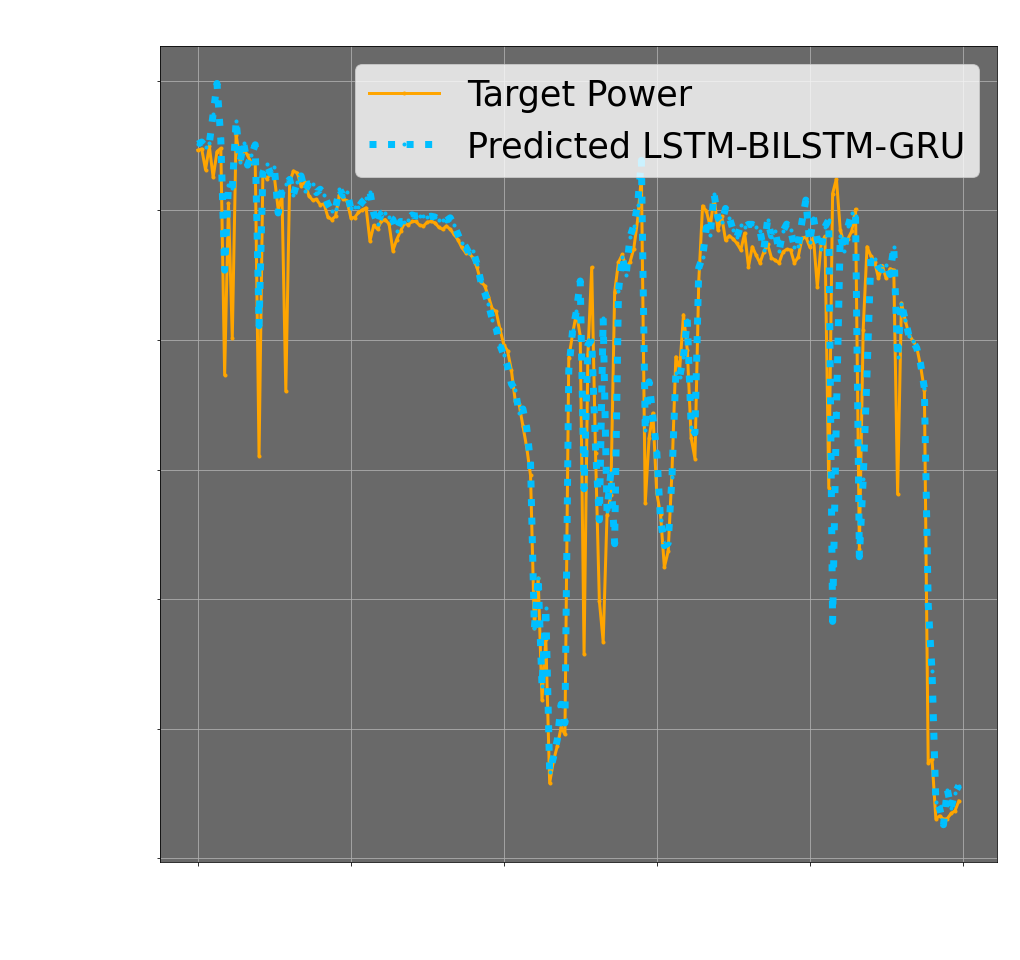

<Figure size 432x288 with 0 Axes>

Prediction plot is saved to./predictionPlot.png


In [44]:

#algorithm= net.name
plt.figure(figsize=(15,15))
targetPlot,=plt.plot(df_day.Actual_Values,label='Target Power',color='orange',marker='.',linestyle='-',linewidth=3)
predictedPlot,=plt.plot(df_day.Optimal_Values,label='Predicted LSTM-BILSTM-GRU',color='deepskyblue',marker='.',linestyle=':',linewidth=7)
#LSTMPlot,=plt.plot(df_day.Pred_LSTM,label='LSTM predicted',color='tomato',marker='.',linestyle='--',linewidth=3)
#BILSTMPlot,=plt.plot(df_day.Pred_BILSTM,label='BILSTM predicted',color='lightgreen',marker='.',linestyle='-.',linewidth=3)
#GRUPlot,=plt.plot(df_day.Pred_GRU,label='GRU predicted',color='pink',marker='.',linestyle=':',linewidth=3)
#plt.xlim([8500,9000])
  #plt.ylim([0, 1000])
plt.ylabel('Renewable Energy',fontsize=40,color='white')
plt.xlabel('Predictions for next two days',fontsize=40,color='white')
plt.yticks(fontsize=40,color='white')
plt.xticks(fontsize=40,color='white')
plt.ion()
plt.grid()
plt.legend(handles=[targetPlot, predictedPlot], prop={'size': 35})
plt.title(' LSTM-BILSTM-GRU',fontsize=40,fontweight=40,color='white')
plot_path = './predictionPlot.png'
plt.savefig(plot_path,plot_pathbbox_inches='tight')
ax = plt.axes()
ax.set_facecolor('dimgrey')
fig = plt.figure()
fig.patch.set_facecolor('xkcd:mint green')
plt.draw()
plt.show()
plt.pause(0)
print('Prediction plot is saved to'+plot_path)

<ipython-input-45-50ca5e2720a1>:20: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



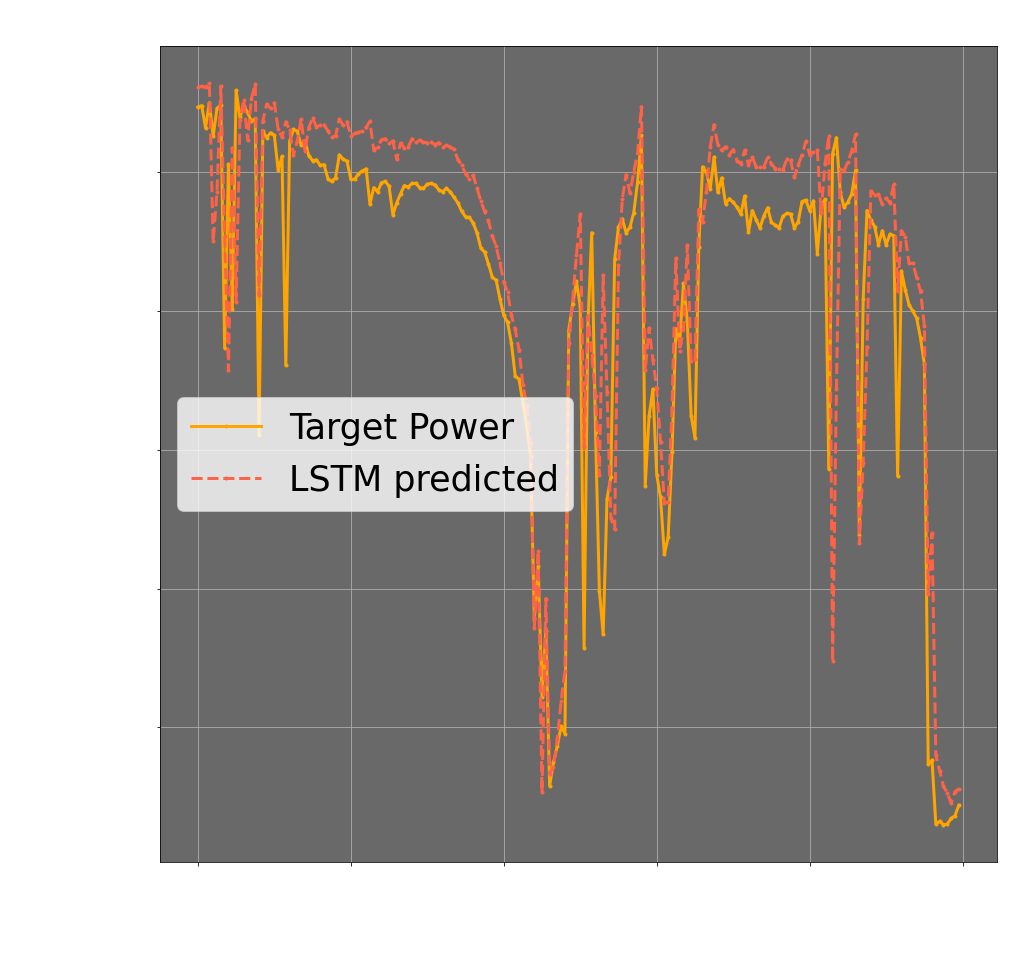

<Figure size 432x288 with 0 Axes>

Prediction plot is saved to./predictionPlot.png


In [45]:
#algorithm= net.name
plt.figure(figsize=(15,15))
targetPlot,=plt.plot(df_day.Actual_Values,label='Target Power',color='orange',marker='.',linestyle='-',linewidth=3)
#predictedPlot,=plt.plot(df_day.Optimal_Values,label='Predicted LSTM-BILSTM-GRU',color='deepskyblue',marker='.',linewidth=7)
LSTMPlot,=plt.plot(df_day.Pred_LSTM,label='LSTM predicted',color='tomato',marker='.',linestyle='--',linewidth=3)
#BILSTMPlot,=plt.plot(df_day.Pred_BILSTM,label='BILSTM predicted',color='lightgreen',marker='.',linestyle='-.',linewidth=3)
#GRUPlot,=plt.plot(df_day.Pred_GRU,label='GRU predicted',color='pink',marker='.',linestyle=':',linewidth=3)
#plt.xlim([8500,9000])
  #plt.ylim([0, 1000])
plt.ylabel('Renewable Energy',fontsize=40,color='white')
plt.xlabel('Predictions for next two days',fontsize=40,color='white')
plt.yticks(fontsize=40,color='white')
plt.xticks(fontsize=40,color='white')
plt.ion()
plt.grid()
plt.legend(handles=[targetPlot, LSTMPlot], prop={'size': 35})
plt.title(' LSTM',fontsize=40,fontweight=40,color='white')
plot_path = './predictionPlot.png'
plt.savefig(plot_path,plot_pathbbox_inches='tight')
ax = plt.axes()
ax.set_facecolor('dimgrey')
fig = plt.figure()
fig.patch.set_facecolor('xkcd:mint green')
plt.draw()
plt.show()
plt.pause(0)
print('Prediction plot is saved to'+plot_path)

<ipython-input-46-ea3f8ba16d6f>:20: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



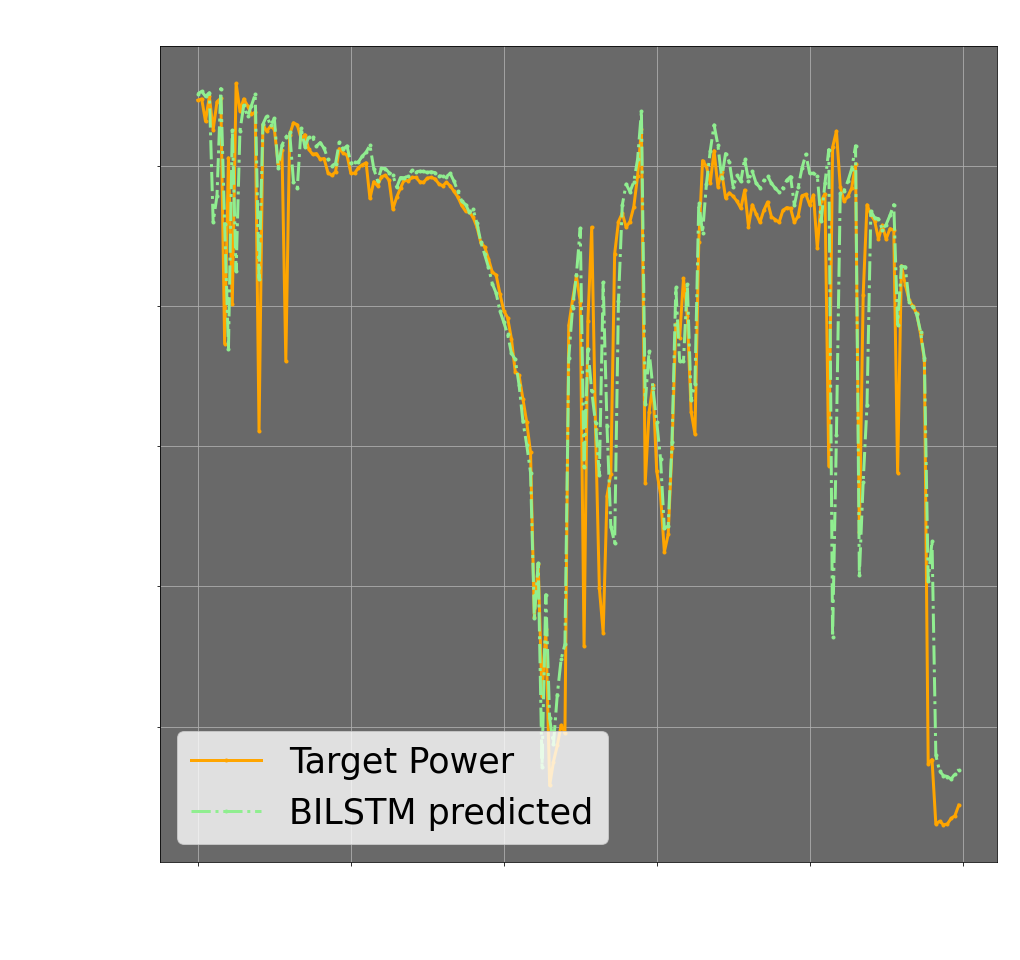

<Figure size 432x288 with 0 Axes>

Prediction plot is saved to./predictionPlot.png


In [46]:

#algorithm= net.name
plt.figure(figsize=(15,15))
targetPlot,=plt.plot(df_day.Actual_Values,label='Target Power',color='orange',marker='.',linestyle='-',linewidth=3)
#predictedPlot,=plt.plot(df_day.Optimal_Values,label='Predicted LSTM-BILSTM-GRU',color='deepskyblue',marker='.',linewidth=7)
#LSTMPlot,=plt.plot(df_day.Pred_LSTM,label='LSTM predicted',color='tomato',marker='.',linestyle='--',linewidth=3)
BILSTMPlot,=plt.plot(df_day.Pred_BILSTM,label='BILSTM predicted',color='lightgreen',marker='.',linestyle='-.',linewidth=3)
#GRUPlot,=plt.plot(df_day.Pred_GRU,label='GRU predicted',color='pink',marker='.',linestyle=':',linewidth=3)
#plt.xlim([8500,9000])
  #plt.ylim([0, 1000])
plt.ylabel('Renewable Energy',fontsize=40,color='white')
plt.xlabel('Predictions for next two days',fontsize=40,color='white')
plt.yticks(fontsize=40,color='white')
plt.xticks(fontsize=40,color='white')
plt.ion()
plt.grid()
plt.legend(handles=[targetPlot, BILSTMPlot], prop={'size': 35})
plt.title(' BiLSTM',fontsize=40,fontweight=40,color='white')
plot_path = './predictionPlot.png'
plt.savefig(plot_path,plot_pathbbox_inches='tight')
ax = plt.axes()
ax.set_facecolor('dimgrey')
fig = plt.figure()
fig.patch.set_facecolor('xkcd:mint green')
plt.draw()
plt.show()
plt.pause(0)
print('Prediction plot is saved to'+plot_path)

<ipython-input-47-018cd3485854>:20: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



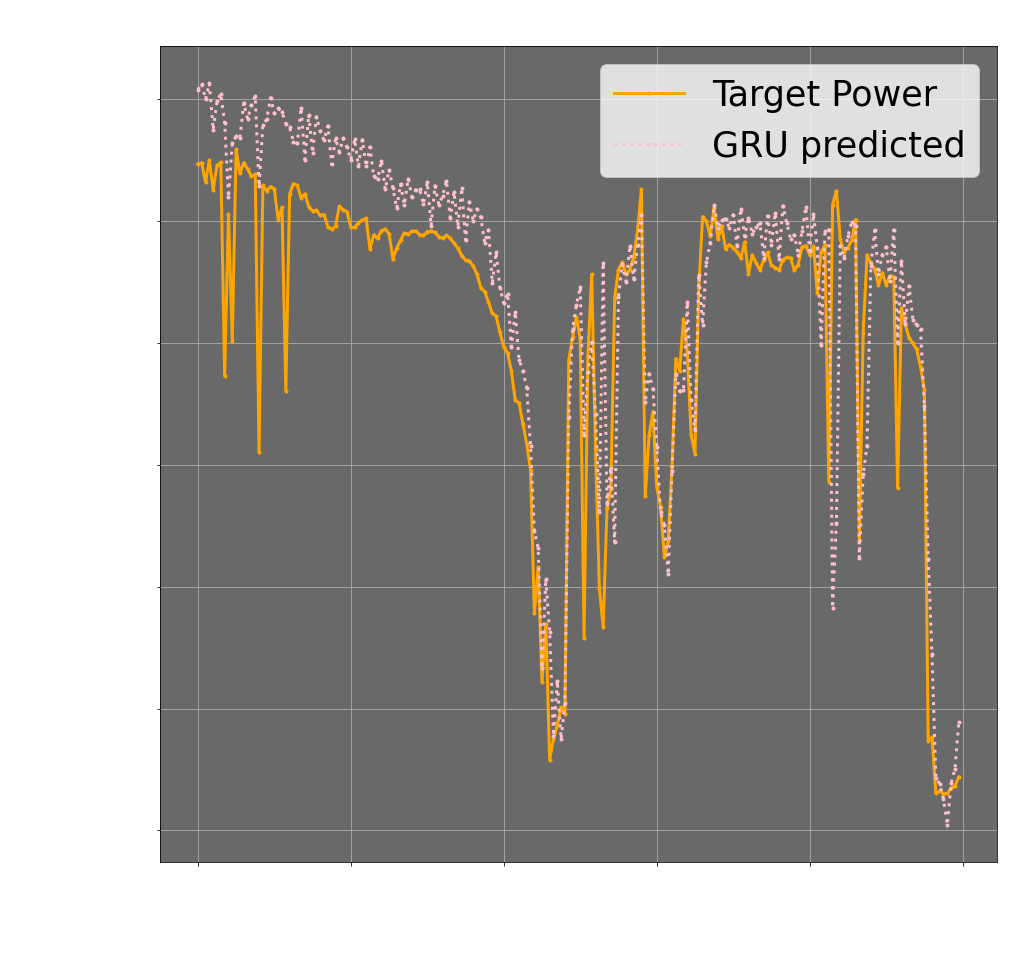

<Figure size 432x288 with 0 Axes>

Prediction plot is saved to./predictionPlot.png


In [47]:
#algorithm= net.name
plt.figure(figsize=(15,15))
targetPlot,=plt.plot(df_day.Actual_Values,label='Target Power',color='orange',marker='.',linestyle='-',linewidth=3)
#predictedPlot,=plt.plot(df_day.Optimal_Values,label='Predicted LSTM-BILSTM-GRU',color='deepskyblue',marker='.',linewidth=7)
#LSTMPlot,=plt.plot(df_day.Pred_LSTM,label='LSTM predicted',color='tomato',marker='.',linestyle='--',linewidth=3)
#BILSTMPlot,=plt.plot(df_day.Pred_BILSTM,label='BILSTM predicted',color='lightgreen',marker='.',linestyle='-.',linewidth=3)
GRUPlot,=plt.plot(df_day.Pred_GRU,label='GRU predicted',color='pink',marker='.',linestyle=':',linewidth=3)
#plt.xlim([8500,9000])
  #plt.ylim([0, 1000])
plt.ylabel('Renewable Energy',fontsize=40,color='white')
plt.xlabel('Predictions for next two days',fontsize=40,color='white')
plt.yticks(fontsize=40,color='white')
plt.xticks(fontsize=40,color='white')
plt.ion()
plt.grid()
plt.legend(handles=[targetPlot, GRUPlot], prop={'size': 35})
plt.title(' GRU',fontsize=40,fontweight=40,color='white')
plot_path = './predictionPlot.png'
plt.savefig(plot_path,plot_pathbbox_inches='tight')
ax = plt.axes()
ax.set_facecolor('dimgrey')
fig = plt.figure()
fig.patch.set_facecolor('xkcd:mint green')
plt.draw()
plt.show()
plt.pause(0)
print('Prediction plot is saved to'+plot_path)

In [48]:
df_day

,Date_time_name,Pred_LSTM,Pred_GRU,Pred_BILSTM,Actual_Values,new_col,Optimal_Values,month,year,day,hour,minutes,month_year,day_year,hour_day,hour_minutes
0,4/10/2017 9:53,1121.088294,1215.110899,1102.476018,1093,0,1102.476018,4,2017,10,9,53,2017-4,10-4,9-10,9-53
5,4/10/2017 9:58,1122.917011,1225.144378,1105.702165,1095,5,1105.702165,4,2017,10,9,58,2017-4,10-4,9-10,9-58
10,4/10/2017 10:03,1121.128187,1199.127163,1098.544902,1063,10,1098.544902,4,2017,10,10,3,2017-4,10-4,10-10,10-3
15,4/10/2017 10:08,1126.893719,1225.208442,1103.855630,1099,15,1103.855630,4,2017,10,10,8,2017-4,10-4,10-10,10-8
20,4/10/2017 10:13,899.562106,1149.173583,919.181856,1051,20,1149.173583,4,2017,10,10,13,2017-4,10-4,10-10,10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
975,5/10/2017 16:28,115.173319,51.500986,130.115059,60,975,51.500986,5,2017,10,16,28,2017-5,10-5,16-10,16-28
980,5/10/2017 16:33,105.868000,9.441343,128.776782,61,980,105.868000,5,2017,10,16,33,2017-5,10-5,16-10,16-33
985,6/10/2017 7:47,91.386698,77.734467,125.134872,69,985,77.734467,6,2017,10,7,47,2017-6,10-6,7-10,7-47
990,6/10/2017 7:52,107.528958,101.008343,132.506076,73,990,101.008343,6,2017,10,7,52,2017-6,10-6,7-10,7-52


In [50]:
y_pred=df_day['Optimal_Values']
y_test=df_day['Actual_Values']

In [51]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

def MAPE(Y_actual,Y_Predicted):
  mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
  return mape

MSE=mean_squared_error(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))
RMSELOG=np.log(np.sqrt(mean_squared_error(y_test,y_pred)))
R2 = r2_score(y_test,y_pred)
MAPE=np.mean(np.abs((y_test - y_pred)/y_test))*100
print('Mean Absolute Error: {:.4f}'.format(MAE))
print('Root Mean Square Error: {:.4f}'.format(RMSE))
print('Root Mean Square Error_LOG: {:.4f}'.format(RMSELOG))
print('Mean Square Error: {:.4f}'.format(MSE))
print('r_2 score:{:.4f}'.format(R2))
print('MAPE score:{:.4f}'.format(MAPE))
print('')

Mean Absolute Error: 42.9239
Root Mean Square Error: 95.4915
Root Mean Square Error_LOG: 4.5590
Mean Square Error: 9118.6202
r_2 score:0.8659
MAPE score:8.3558

